# OCSMM-SHAP 
## Student grades at school level - Synthetic dataset

In [205]:
import pandas as pd
import numpy as np

# Configuration
n_schools = 30
n_students_per_school = 100  # 100 students per school
subjects = ["Math", "Physics", "History", "English", "Geography", 
            "Art", "Music", "PE", "Chemistry", "Biology"]
n_subjects = 10
np.random.seed(42)
dataset = []

In [206]:
dataset = []
for school_id in range(n_schools):
    school_grades = np.zeros((n_students_per_school, n_subjects))

    # Base grade distribution
    base_params = np.array([
        [75, 5],   # Math
        [80, 4],   # Physics
        [70, 8],   # History
        [72, 6],   # English
        [68, 7],   # Geography
        [85, 3],   # Art
        [88, 2],   # Music
        [90, 1],   # PE
        [78, 5],   # Chemistry
        [77, 5]    # Biology
    ])

    if school_id == 28:
        #  Feature-level anomaly: excelling in Physics
        base_params[1][0] += 12  # Boost Physics mean from 80 → 92
        for subj_idx in range(n_subjects):
            mean, std = base_params[subj_idx]
            grades = np.random.normal(mean, std, n_students_per_school)
            school_grades[:, subj_idx] = np.clip(grades, 0, 100).astype(int)

    elif school_id == 29:
        # 🔸 Interaction-level anomaly: strong Art–History correlation
        mean = [85, 70]  # Art mean, History mean
        cov = [[9, 8], [8, 16]]  # Strong positive covariance between Art and History
        art_hist = np.random.multivariate_normal(mean, cov, n_students_per_school)

        for subj_idx in range(n_subjects):
            if subj_idx == 2:  # History
                grades = np.clip(art_hist[:, 1], 0, 100)
            elif subj_idx == 5:  # Art
                grades = np.clip(art_hist[:, 0], 0, 100)
            else:
                mean, std = base_params[subj_idx]
                grades = np.random.normal(mean, std, n_students_per_school)
                grades = np.clip(grades, 0, 100)
            school_grades[:, subj_idx] = grades.astype(int)

    else:
        # Normal schools
        for subj_idx in range(n_subjects):
            mean, std = base_params[subj_idx]
            grades = np.random.normal(mean, std, n_students_per_school)
            school_grades[:, subj_idx] = np.clip(grades, 0, 100).astype(int)

    dataset.append(school_grades)


In [207]:
# def add_interaction(group: np.ndarray, p: int, q: int) -> np.ndarray:
#     # p=1 (Physics), q=5 (Art)  in your column order
#     prod = (group[:, p] * group[:, q]).reshape(-1, 1)
#     # return np.hstack([group, prod]) 

In [208]:
# groups_aug = [add_interaction(g, 1, 5) for g in dataset]

In [209]:
# dataset = groups_aug

In [210]:
# # # Anomaly 1: Art grades (column 5) much lower
# dataset[29][:, 5] = np.random.randint(20, 40, size=n_students_per_school)

# # # Anomaly 2: Physics grades (column 1) higher with outliers
# physics_grades = np.random.normal(95, 15, n_students_per_school)
# dataset[29][:, 1] = np.clip(physics_grades, 0, 100).astype(int)

In [211]:
# art_grades =  np.random.normal(85, 15, n_students_per_school)
# dataset[29][:, 5] = np.clip(art_grades, 0, 100).astype(int)

# physics_grades = np.random.normal(80, 15, n_students_per_school)
# dataset[29][:, 1] = np.clip(physics_grades, 0, 100).astype(int)

In [212]:
len(dataset)

30

In [213]:
dataset

[array([[ 77.,  74.,  72.,  67.,  56.,  87.,  89.,  89.,  82.,  78.],
        [ 74.,  78.,  74.,  68.,  63.,  90.,  86.,  91.,  75.,  75.],
        [ 78.,  78.,  78.,  76.,  68.,  80.,  89.,  89.,  78.,  77.],
        [ 82.,  76.,  78.,  75.,  68.,  86.,  90.,  88.,  75.,  83.],
        [ 73.,  79.,  58.,  71.,  64.,  83.,  88.,  88.,  75.,  77.],
        [ 73.,  81.,  62.,  72.,  72.,  83.,  91.,  90.,  76.,  77.],
        [ 82.,  87.,  74.,  79.,  60.,  83.,  86.,  88.,  79.,  70.],
        [ 78.,  80.,  74.,  68.,  67.,  82.,  85.,  91.,  75.,  80.],
        [ 72.,  81.,  74.,  75.,  68.,  85.,  84.,  87.,  84.,  80.],
        [ 77.,  79., 100.,  70.,  71.,  82.,  90.,  91.,  73.,  87.],
        [ 72.,  72.,  74.,  70.,  72.,  85.,  89.,  90.,  77.,  75.],
        [ 72.,  79.,  79.,  78.,  60.,  84.,  87.,  89.,  75.,  78.],
        [ 76.,  80.,  77.,  76.,  57.,  84.,  88.,  89.,  85.,  78.],
        [ 65.,  89.,  75.,  76.,  76.,  82.,  85.,  90.,  78.,  84.],
        [ 66.,  79.,

In [214]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [215]:
classifier = OneClassSMMClassifier(nu=0.3)

In [216]:
classifier.fit(dataset[:28])

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [217]:
decision, y_pred = classifier.predict(dataset)

Calculating kappa.

calculating rho.

0.9512195262464904


In [218]:
decision

array([ 0.00102502, -0.00398777,  0.00959266,  0.00102712,  0.00500648,
        0.00275681,  0.00102861,  0.0010299 ,  0.00255891,  0.00102901,
        0.00895924,  0.00102718,  0.00265636,  0.00102715,  0.00304491,
        0.0010259 ,  0.00471088,  0.00072448,  0.00408568,  0.00319213,
        0.0010271 ,  0.0026198 , -0.01017865,  0.00102719,  0.00102714,
        0.00468823,  0.00102717,  0.00111345, -0.34329016, -0.00550376])

In [219]:
y_pred = np.sign(decision)

In [220]:
y_pred

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.])

In [221]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[1, 22, 28, 29]

In [222]:
from src.explanation_algorithms.OCSMMSHAP_copy import KernelSHAPIQ

shapiq = KernelSHAPIQ(n=n_subjects, max_order=2)
interactions_per_group = shapiq.explain_single_group(
    group_data=dataset[29],
    X_train=dataset,  
    model=classifier,
    regularization=1e-6)

100%|██████████| 1024/1024 [00:09<00:00, 113.72it/s]


1024
[ 0.06249945  0.0141565   0.00709277  0.04215687 -0.01135257  0.00630804
 -0.01369663  0.01546155  0.00031919 -0.01493796 -0.01056385  0.01501734
  0.0104433  -0.00128535 -0.00571123  0.0021928  -0.00637544  0.00149666
 -0.01481039  0.00111246 -0.0179186   0.01056763 -0.00222684  0.0091556
 -0.01073667 -0.00244872 -0.01401634 -0.00317637  0.01828145  0.00036219
 -0.03888085 -0.01118585  0.00648004 -0.01250677  0.02927182  0.02090445
  0.01586422 -0.0159272   0.00074498 -0.01536457 -0.00511003 -0.01085955
  0.01588759 -0.00544808  0.00272512 -0.02099799  0.00440291  0.00658363
 -0.01135775  0.00531929 -0.00027058 -0.00865345  0.01885179 -0.00019445
 -0.00355058  0.00894528]


In [223]:
interactions_per_group.dict_values

{(): 0.06249945478607065,
 (0,): 0.014156502963127562,
 (1,): 0.007092768922677737,
 (2,): 0.0421568694440127,
 (3,): -0.0113525742607277,
 (4,): 0.006308036086110036,
 (5,): -0.013696631255599102,
 (6,): 0.015461551959150525,
 (7,): 0.00031919374071869656,
 (8,): -0.014937963644630577,
 (9,): -0.010563853705684339,
 (0, 1): 0.015017337571800411,
 (0, 2): 0.010443304028235748,
 (0, 3): -0.001285349619650982,
 (0, 4): -0.00571123146821321,
 (0, 5): 0.002192801894754613,
 (0, 6): -0.00637544131517369,
 (0, 7): 0.0014966595593866286,
 (0, 8): -0.014810385310789735,
 (0, 9): 0.001112456368155036,
 (1, 2): -0.01791860009244385,
 (1, 3): 0.010567625588921652,
 (1, 4): -0.002226839014977506,
 (1, 5): 0.00915560054468651,
 (1, 6): -0.010736666265149044,
 (1, 7): -0.0024487188976926237,
 (1, 8): -0.014016335844178895,
 (1, 9): -0.003176371272667304,
 (2, 3): 0.0182814507764933,
 (2, 4): 0.0003621879853871151,
 (2, 5): -0.03888085008314235,
 (2, 6): -0.011185849122245694,
 (2, 7): 0.006480041770

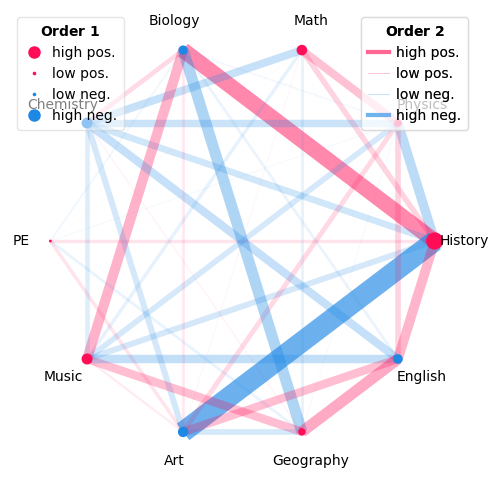

In [ ]:
interactions_per_group.plot_network(feature_names=subjects, show=False)


100%|██████████| 1024/1024 [00:07<00:00, 141.93it/s]


1024
[ 0.06249945 -0.05410531  0.63636961 -0.12610391 -0.09542362 -0.07898078
 -0.00929878  0.01125126 -0.03414784 -0.11023026 -0.1047162  -0.04842795
 -0.00851752  0.02028586 -0.02819768  0.00619733 -0.05839792  0.00491886
  0.06939784  0.02614706 -0.20768859 -0.46527364 -0.06536298  0.06929084
  0.32197437 -0.22610449 -0.47315747 -0.40097464  0.09355214  0.09983039
 -0.0322213  -0.06814009 -0.01039127  0.02754013  0.0709414   0.05031222
  0.04131209 -0.03207252  0.04557049  0.10668777  0.09909594 -0.08007834
 -0.09504727 -0.00349419  0.06321157  0.03068443 -0.05409315  0.02610866
 -0.04107724 -0.00253487 -0.01153927  0.01154075 -0.02913491  0.09520981
  0.06580899  0.13406712]


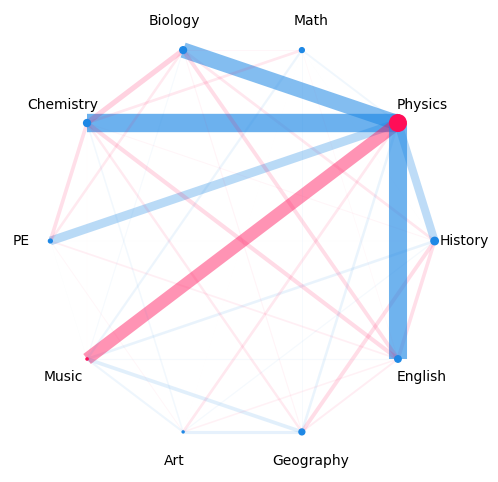

In [225]:
shapiq = KernelSHAPIQ(n=n_subjects, max_order=2)
interactions_per_group = shapiq.explain_single_group(
    group_data=dataset[28],
    X_train=dataset,  
    model=classifier,
    regularization=1e-6)
interactions_per_group.plot_network(feature_names=subjects, show=True, draw_legend=False)

In [226]:
interactions_per_group.dict_values

{(): 0.06249945478607065,
 (0,): -0.05410530996966505,
 (1,): 0.6363696114241923,
 (2,): -0.126103910410208,
 (3,): -0.09542361554763718,
 (4,): -0.07898077821736318,
 (5,): -0.009298783600377827,
 (6,): 0.011251255340771293,
 (7,): -0.03414784466667264,
 (8,): -0.1102302605454454,
 (9,): -0.10471620272134433,
 (0, 1): -0.048427952710598104,
 (0, 2): -0.008517516081991881,
 (0, 3): 0.020285855361326793,
 (0, 4): -0.02819768223655318,
 (0, 5): 0.00619732886291696,
 (0, 6): -0.058397924977082,
 (0, 7): 0.004918861895355445,
 (0, 8): 0.06939783915633013,
 (0, 9): 0.02614705517195494,
 (1, 2): -0.2076885898277482,
 (1, 3): -0.46527364405264976,
 (1, 4): -0.06536297934093065,
 (1, 5): 0.06929083808068626,
 (1, 6): 0.32197436711371946,
 (1, 7): -0.22610448676876677,
 (1, 8): -0.47315746777970136,
 (1, 9): -0.4009746444777448,
 (2, 3): 0.09355213522830003,
 (2, 4): 0.09983039243908443,
 (2, 5): -0.032221300732636994,
 (2, 6): -0.06814009285949983,
 (2, 7): -0.010391270154941614,
 (2, 8): 0.02

In [30]:
ocsmm_shap.compute_interaction_values()[0][5]

tensor([ 4.1277e-04, -5.2770e-04,  2.2255e-04,  5.7318e-05, -3.8627e-04,
         4.9011e-04, -6.2361e-05, -4.6450e-04, -8.9833e-04,  1.0531e-04,
         3.3789e-04,  1.8201e-04, -6.4030e-05,  5.3426e-04, -1.1892e-04,
         3.9644e-04, -7.7479e-04, -1.7794e-04, -5.7504e-05, -6.0043e-04,
        -2.9371e-04,  1.0648e-04, -3.5923e-05, -5.1999e-04,  5.4059e-05,
         1.2662e-04,  5.7371e-04,  9.5115e-04,  2.0528e-04,  1.1104e-03,
         1.5242e-05, -1.0141e-03,  1.7716e-04, -3.4509e-04, -8.3318e-05,
        -4.3066e-04, -1.7201e-04,  3.9640e-04, -6.9330e-05,  8.8406e-04,
        -2.9624e-04,  1.3540e-04, -2.4863e-04, -2.8003e-04, -3.0426e-04,
        -1.3080e-04,  8.8399e-04, -1.6038e-04, -4.4549e-04, -2.2506e-04,
        -3.3935e-05,  1.1741e-04,  2.4311e-04,  3.9663e-04,  1.0556e-04])

In [26]:
decision[29]

np.float64(-9.342443046354813)

In [33]:
sum = shapley_values.T[29].sum()
sum

tensor(-14.3765)

In [27]:
base, phi1, phi2_list = ocsmm_shap.compute_interaction_shapley_values_concise()


DEBUG: phi_main shape: torch.Size([10, 30]), dtype: torch.float32
DEBUG: baseline_values shape: torch.Size([30]), dtype: torch.float32
DEBUG: residuals_after_main_effects shape: torch.Size([1024, 30]), dtype: torch.float32
DEBUG: X_2 shape: torch.Size([1024, 45])
DEBUG: W_2_values (sample): tensor([1.0000e+09, 1.0000e+09, 1.0000e+09, 1.0000e+00, 1.0000e+09]), shape: torch.Size([1024])
DEBUG: X2tY2_tilde shape: torch.Size([45, 30])
DEBUG: X2tX2_tilde_reg shape: torch.Size([45, 45])
DEBUG: phi_2_vector shape: torch.Size([45, 30]), dtype: torch.float32


In [30]:
phi2_list[29][0][1]

tensor(0.3291)

In [32]:
base[29] + sum 

tensor(-9.3341)

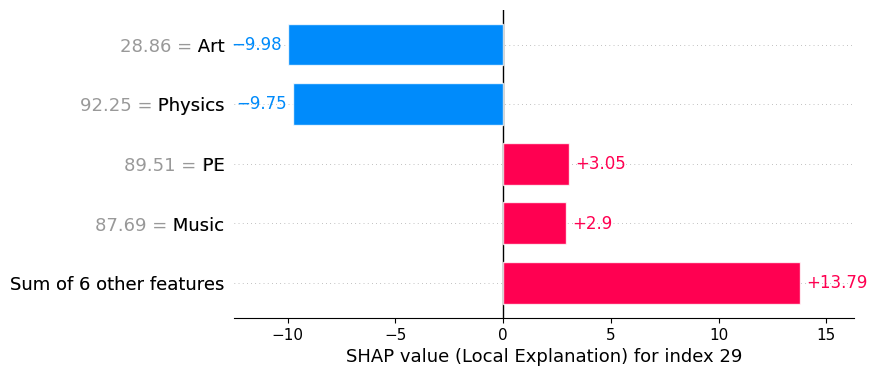

In [18]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm, summary_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T.numpy(), 29, feature_names=subjects, datasets=dataset)

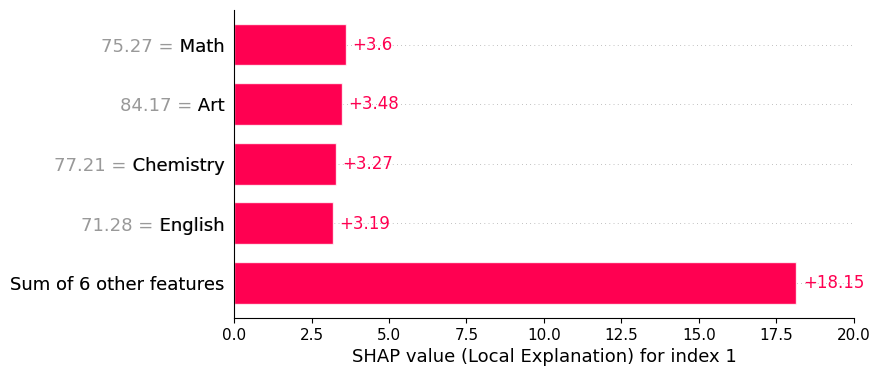

In [19]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 1, feature_names=subjects, datasets=dataset)

/tmp/ipykernel_19366/4265259750.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


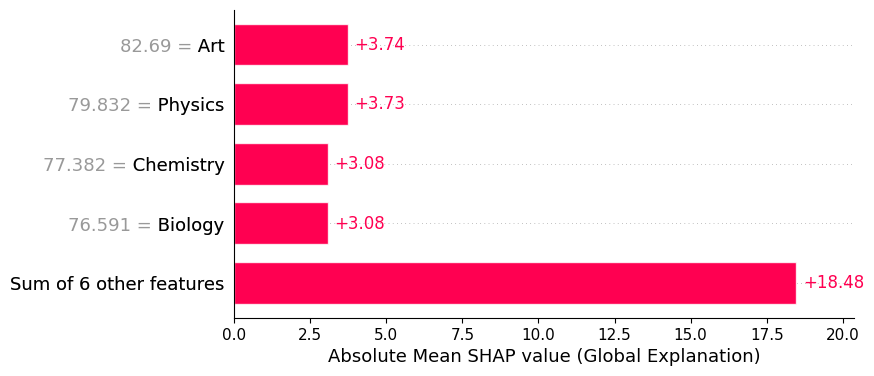

In [20]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values.numpy(), feature_names=subjects, datasets=dataset)

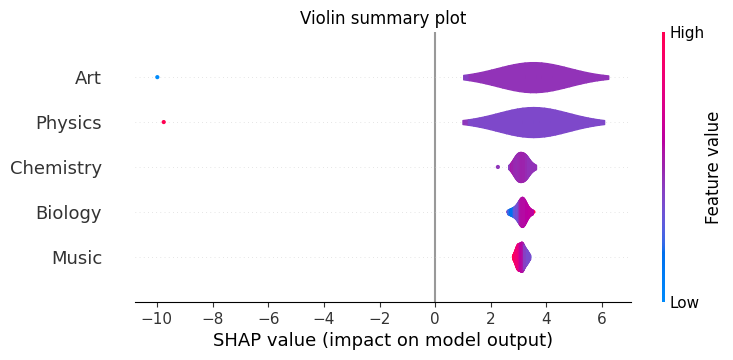

In [21]:
summary_plot_ocsmm(shapley_values.T.numpy(), feature_names=subjects, datasets=dataset)

In [22]:
interactions = ocsmm_shap.compute_interaction_shapley_values_concise()

In [23]:
min_result = min(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])
min_result

(29, -0.7821201086044312)

In [24]:
max_result = max(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])
max_result

(25, 0.9053809642791748)

In [25]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network

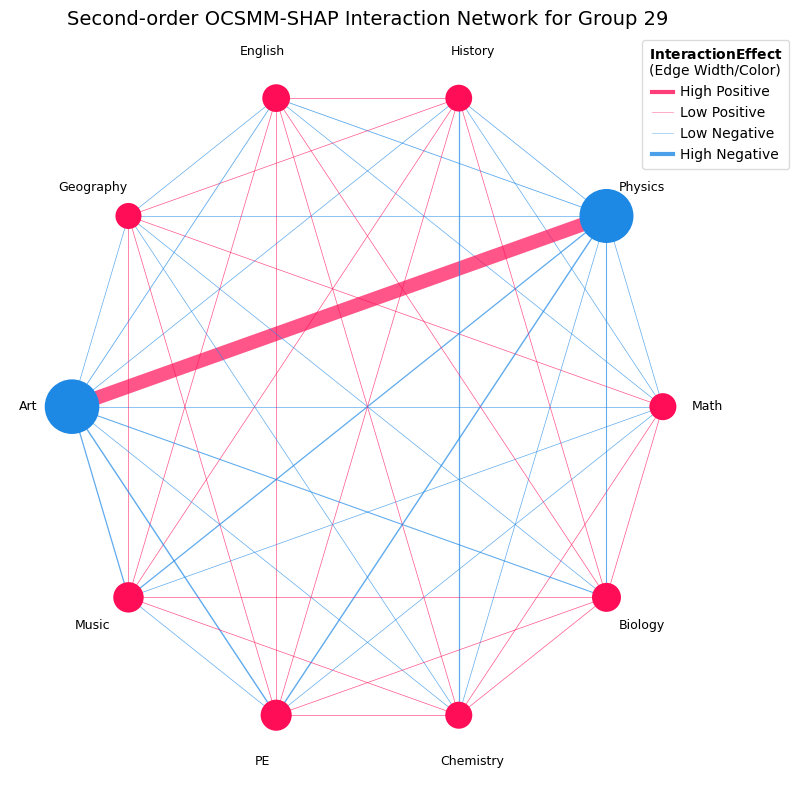

In [26]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[29],
        interaction_matrix_group=interactions[29],
        feature_names=subjects,
        group_id="29"
    )

In [31]:
from src.explanation_algorithms.OCSMM_interaction import OCSMMSHAP
ocsmm_exp = OCSMMSHAP(X=dataset, classifier=classifier, decision=decision)

In [32]:
ocsmm_exp.fit(dataset, 2**dataset[0].shape[1])

Calculating value functions v(S):   0%|          | 0/1023 [00:00<?, ?it/s]

Calculating value functions v(S): 100%|██████████| 1023/1023 [00:08<00:00, 125.30it/s]


OCSMM-SHAP fitting complete.


In [33]:
shapley_dict = ocsmm_exp.compute_shapley_values_dict()

Calculating main effects (phi_1)...
Calculating residuals for interactions...
Calculating interaction effects (phi_2)...
Assembling output dictionaries...
Shapley value dictionary computation complete.


In [35]:
shapley_dict[29]

{(): 30.793743133544922,
 (0,): 2.2504897117614746,
 (1,): -9.752904891967773,
 (2,): 2.211686611175537,
 (3,): 2.377558946609497,
 (4,): 2.073377847671509,
 (5,): -9.983898162841797,
 (6,): 2.909353017807007,
 (7,): 3.044381618499756,
 (8,): 2.248178720474243,
 (9,): 2.6237008571624756,
 (0, 1): -0.8165514469146729,
 (0, 2): -0.06355022639036179,
 (0, 3): -0.5204272270202637,
 (0, 4): 0.23643043637275696,
 (0, 5): -0.8159846663475037,
 (0, 6): -0.038597989827394485,
 (0, 7): -0.039545271545648575,
 (0, 8): 0.49095067381858826,
 (0, 9): 0.0270756334066391,
 (1, 2): -0.912205696105957,
 (1, 3): -1.0615938901901245,
 (1, 4): -0.7268368601799011,
 (1, 5): 17.467538833618164,
 (1, 6): -1.5904070138931274,
 (1, 7): -1.7757574319839478,
 (1, 8): -0.8779115080833435,
 (1, 9): -1.3365504741668701,
 (2, 3): 0.023641739040613174,
 (2, 4): 0.2143130749464035,
 (2, 5): -0.9022924304008484,
 (2, 6): 0.6720600128173828,
 (2, 7): 0.4909241795539856,
 (2, 8): -1.5841660499572754,
 (2, 9): 0.6015915870